# Session 1a - Clustering

In [3]:
%pylab inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import IPython
import platform

from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

Populating the interactive namespace from numpy and matplotlib


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.25, random_state=33)
    
# Standarize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn import cluster
clf_sepal = cluster.KMeans(init='k-means++', n_clusters=3, random_state=33)
clf_sepal.fit(X_train[:,0:2])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=33, tol=0.0001, verbose=0)

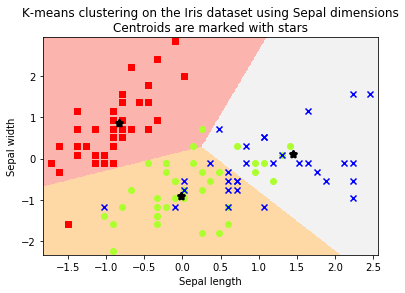

In [8]:
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]

#make a grid of numbers that span from min:max of sepal length and width
def make_bg_grid(clf, X_train):
    step = .01 
    margin = .1   
    sl_min, sl_max = X_train[:, 0].min()-margin, X_train[:, 0].max() + margin
    sw_min, sw_max = X_train[:, 1].min()-margin, X_train[:, 1].max() + margin
    #use numpy meshgrid to make a rectangular array from the limit values
    sl, sw  = np.meshgrid(
        np.arange(sl_min, sl_max, step), #arange creates an array that spans the specified range
        np.arange(sw_min, sw_max, step)
        )
    Zs = clf.predict(np.c_[sl.ravel(), sw.ravel()]).reshape(sl.shape) # predict a Z value for each point in the grid
    return Zs, sl, sw

Zs, sl, sw = make_bg_grid(clf_sepal, X_train)

centroids_s = clf_sepal.cluster_centers_

#rjm49 - Now we've got the centroids, we can display the data points and the calculated regions, add the centroids as an extra scatter

plt.figure(1)
plt.clf()
plt.imshow(Zs, interpolation='nearest', extent=(sl.min(), sl.max(), sw.min(), sw.max()), cmap= plt.cm.Pastel1, aspect='auto', origin='lower')
for j in [0,1,2]:
    px = X_train[:, 0][y_train == j]
    py = X_train[:, 1][y_train == j]
    plt.scatter(px, py, c=colormarkers[j][0], marker= colormarkers[j][1])
plt.scatter(centroids_s[:, 0], centroids_s[:, 1],marker='*',linewidths=3, color='black', zorder=10)
plt.title('K-means clustering on the Iris dataset using Sepal dimensions\nCentroids are marked with stars')
plt.xlim(sl.min(), sl.max())
plt.ylim(sw.min(), sw.max())
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

What happens if we grow the number of clusters?  Finish the routine to find out:

In [52]:

for n_clus in [2,3,5,10]:
    clf_sepal = None
    clf_sepal.fit(X_train[:,0:2])

    Zs, sl, sw = None

    plt.figure(n_clus)
    plt.clf()
    plt.imshow(Zs, interpolation='nearest', extent=(sl.min(), sl.max(), sw.min(), sw.max()), cmap= plt.cm.Pastel1, aspect='auto', origin='lower')
    for j in None:
        px = X_train[:, 0][y_train == j]
        py = X_train[:, 1][y_train == j]
        plt.scatter(px, py, c=colormarkers[j][0], marker= colormarkers[j][1])
#         plt.scatter(px,py, c=plt.cm.Dark2.colors[j])
    plt.scatter(centroids_s[:, 0], centroids_s[:, 1],marker='*',linewidths=3, color='black', zorder=10)
    plt.title('K-means clustering on the Iris dataset using Sepal dimensions\nCentroids are marked with stars')
    plt.xlim(sl.min(), sl.max())
    plt.ylim(sw.min(), sw.max())
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.show()

SyntaxError: invalid syntax (<ipython-input-52-769b44563bb8>, line 3)

## Summary

- We used k-means clustering to group our flower data into sub-categories (without using the labels).
- We got to grips with some more complicated graph plotting code
- We varied the number of clusters to see how we can force k-means to find sub-categories